### arkusz ten zawiera przykład modeli wraz z opisem hipermarametrów oraz miarami sukcesu.
#### cel: jak określić miarę dokładności modelu

praca na prostym secie danych z zasobów pythona

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
wine=load_wine()

In [3]:
x=wine.data
y=wine.target

In [4]:
model=KNeighborsClassifier(n_neighbors=20)
model.fit(x,y)
pred=model.predict(x)

In [5]:
print(classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        59
           1       0.78      0.63      0.70        71
           2       0.52      0.62      0.57        48

    accuracy                           0.72       178
   macro avg       0.72      0.72      0.71       178
weighted avg       0.73      0.72      0.72       178



opis każdej z miar modelu:
* precision mówi nam jak dobry jest nasz model. poprawnie zakfalifikowane jako POSITIVE do wszystkich odpowiedzi z modelu
* recall mówi nam ile wykryliśmy z populacji. Dobre odpowiedzi do wszytkich będących dobrymi
* f1-score : jest miarą pomiędzy precision i recall, jeżeli nie chcemy popadać w skrajnośc, albo po prostu nie wiemy czy zależy nam na określeniu jak dokładny jest nasz model i jak dobry to zaleca się f1.
* support jest niczym innym jak przypasowaniem danych zmiennych Y do klasy
* accuracy poprawne odpowiedzi do wszytkich odpowiedzi

**używając biblioteki ols jest możliwość określenia podstawowych miar pomiędzy x a y dla modeli regreslii liniowej wielomianowej**

In [6]:
df=pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
target                          178 non-null float64
dtypes: float64(14)
memory usage: 19.6 KB


In [8]:
from statsmodels.formula.api import ols


print("\n[!] magnesium")
mg_lin_regress = ols("target ~ magnesium", df).fit()
print(mg_lin_regress.summary().tables[1])


[!] magnesium
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0704      0.403      5.137      0.000       1.275       2.866
magnesium     -0.0114      0.004     -2.838      0.005      -0.019      -0.003


interpretacja powyższego kodu jest taka: jak wpływa zmienna :magnez na naszy wynik . w tym przypadku target jest oceną wina. Co jest miarą naszego modelu w tym przypadku P>|t| ono musi być jak najmniejsze i w sumie na nie patrzymu tutaj tylko. Mówi nam jak bardzo mylimy się w modelu

In [9]:
mul_lin_regress = ols("target ~ magnesium + total_phenols + alcohol", df).fit()
print(mul_lin_regress.summary().tables[1])

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.5695      0.656      6.970      0.000       3.276       5.863
magnesium        -0.0017      0.003     -0.560      0.576      -0.007       0.004
total_phenols    -0.8380      0.068    -12.378      0.000      -0.972      -0.704
alcohol          -0.1187      0.053     -2.242      0.026      -0.223      -0.014


w powyższym zestawieniu danych opisowych model również patrzymy tylko na P>|t| i jak widać w tym układzie tylko total_phenols i alcohol mają znaczący wpływ na ocenę wina ponieważ P>|t| chcemy aby było zawsze mniejsze od 0.05

#### REGRESJA LOGISTYCZNA

miarą modelu może być krzywa ROC, która mówi nam o poziomie dopasowania danych. dla regresji logistycznej nie mówimy o predykcji ale o prawdopodobieństwie.

In [18]:
from sklearn.linear_model import  LogisticRegression,LinearRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [12]:
X = wine.data[:,:3]
X2 = wine.data[:,:6]
y = (wine.target != 0) * 1
model = LogisticRegression().fit(X,y)
model2 = LogisticRegression().fit(X2,y)

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
proba = model.predict_proba(X)

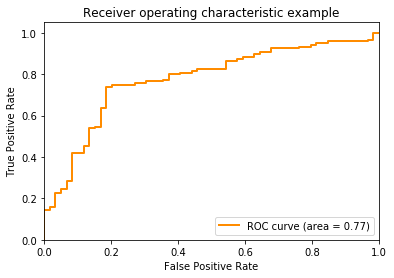

In [20]:
fpr, tpr, thresholds = roc_curve(y, proba[:,1])
roc_auc = auc(fpr, tpr)


lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

krzywa ROC ma dążyć do 1 na osi Y, mówi o poziomie prawidlowego zaklasyfikowania zmiennej y. jeżeli ROC=0.5 to przyporządkowanie jest **czysto losowe** .
więcej teorii [tutaj](https://mathspace.pl/matematyka/receiver-operating-characteristic-krzywa-roc-czyli-ocena-jakosci-klasyfikacji-czesc-7/) oraz odsyłam do [dokumentacji](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_roc_curve_visualization_api.html#sphx-glr-auto-examples-miscellaneous-plot-roc-curve-visualization-api-py) python

#### DRZEWA DECYZYJNE  KLASYFIKACJA

In [21]:
import sklearn.metrics
import sklearn.model_selection
import sklearn.tree as tree
import seaborn as sns

obiekt klasyfikatora

In [22]:
train_data, test_data, train_target, test_target = sklearn.model_selection.train_test_split(wine.data, wine.target)
clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')

hipermapametr 'criterion' do sprawdzenia [tutaj](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

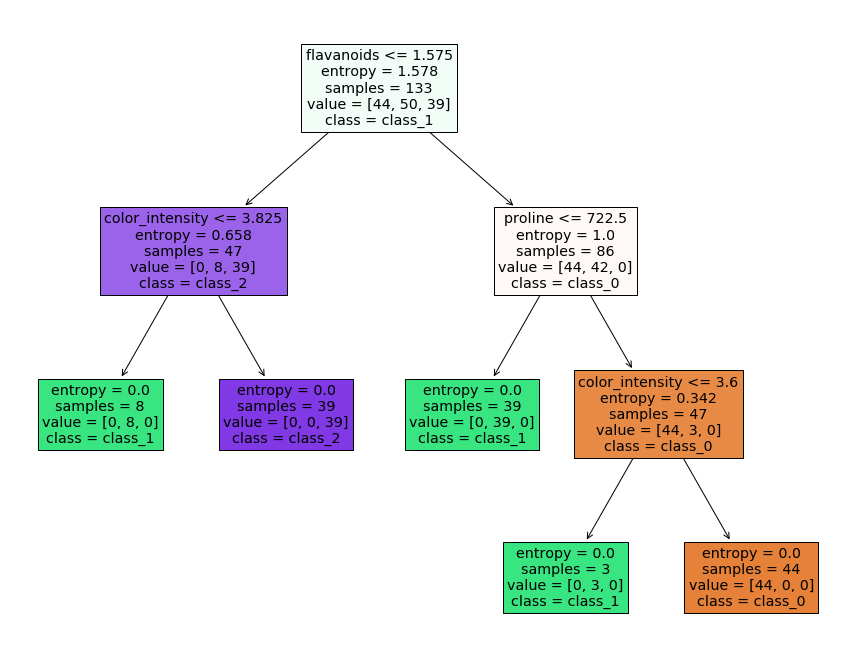

In [23]:
clf.fit(train_data, train_target)

plt.figure(figsize=(15, 12))
_ = tree.plot_tree(clf, filled=True, class_names=wine.target_names, feature_names=wine.feature_names)



mamy możliwość zobaczenia struktury drzewa, wizualnej oceny czy model nie jest za skomplikowany na Nasze dane.

Dla drzewa decyzyjnego miarą dokładności klasyfikacji w oparciu o dane testowe jest score (inaczej accuracy) oznaczone u nas w poniższej lini kodu jako f1-score

In [24]:
clf.score(test_data, test_target)
predictions = clf.predict(test_data)
print(sklearn.metrics.classification_report(test_target, predictions, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.80      0.89        15
     class_1       0.87      0.95      0.91        21
     class_2       0.90      1.00      0.95         9

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



#### DRZEWO DECYZYJNE REGRESJA

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
regressor = DecisionTreeRegressor()
regressor.fit(train_data, train_target)
print("Number of nodes: ", regressor.tree_.node_count)

Number of nodes:  9


jeżeli wiemy, że dane nie są "turbo" złożone to dążymy, aby ilośc pkt węzłowych była mała. na przykładzie wina, jeżeli "nodes" byłoby na poziomie 20+ to oznacza, że raczej to nie jest dobry model, sprawdzimy to jeszcze poniżej

In [28]:
train_predictions = regressor.predict(train_data)
predictions = regressor.predict(test_data)
print("Error on training data: ", sklearn.metrics.mean_squared_error(train_target, train_predictions))
print("Error on test data: ", sklearn.metrics.mean_squared_error(test_target, predictions))

Error on training data:  0.0
Error on test data:  0.08888888888888889


jeżeli błąd danych treningowych jest na poziomie 0 a błąd danych test duży to znaczy, że mamy do czynienia z 'overfitingiem' , dlatego tez mozna ustawić np. **max_depth**

In [29]:
regressor.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

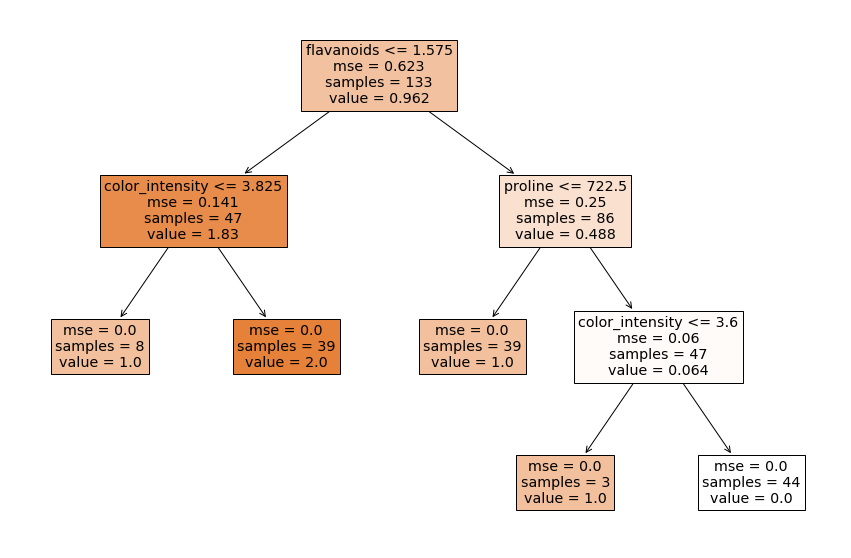

In [30]:
new_regressor = DecisionTreeRegressor(
    max_depth=4)

new_regressor.fit(train_data, train_target)
plt.figure(figsize=(15, 10))
_ = tree.plot_tree(new_regressor, filled=True, feature_names=wine.feature_names)

*uwaga*

w tym przypadku sie nic nie stanie, bo dane są proste i dopasowanie " w punkt"

w celu uśrednienia wyników modelu dokonuje sie cross-validacji w celu nauczeniu modelu na danych train

In [32]:
from sklearn.model_selection import cross_validate

newer_regressor = DecisionTreeRegressor(max_depth=4)

cv_results = cross_validate(
    newer_regressor, wine.data, wine.target, cv=10)  #r^2

scorer = sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error)

cv_results = cross_validate(newer_regressor, wine.data, wine.target, 
                            scoring=scorer, cv=10)  # mse
cv_results

{'fit_time': array([0.00115967, 0.00100946, 0.00099564, 0.00093031, 0.00102258,
        0.00109434, 0.00112891, 0.00114393, 0.0012486 , 0.00115514]),
 'score_time': array([0.00071383, 0.00062394, 0.00072145, 0.00062704, 0.00068283,
        0.00071096, 0.00069427, 0.00070477, 0.00073767, 0.00070119]),
 'test_score': array([0.05555556, 0.11111111, 0.05555556, 0.11111111, 0.05555556,
        0.11111111, 0.        , 0.27777778, 0.11764706, 0.        ])}

jeżeli chcemy i-teracyjnie wybrać najlepsze hipermaparemtry to:

In [33]:
test=pd.DataFrame()
for depth in range(3, 7):
    newer_regressor = DecisionTreeRegressor(max_depth=depth)
    #scorer = sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error)
    #scorer=sklearn.metrics.mean_squared_error(train_target, train_predictions)
    cv_results = cross_validate(newer_regressor, wine.data, wine.target, cv=5) 
    sorted(cv_results.keys())
    
    test1=pd.DataFrame({'krok':[depth],
                       'scorer':[cv_results['test_score']]}) 

    test=pd.concat([test,test1])

#test.sort_values(by=['scorer'],ascending=False)

In [34]:
test.head(1)

,krok,scorer
0,3,"[0.0, 0.7591973244147157, 0.0, 0.2589920082994..."


#### KNN

Będziemy dla wybranej obserwacji ze zbioru testowego sprawdzać jej najbliższych sąsiadów ze zbioru treningowego

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import BallTree
from sklearn import neighbors

In [52]:
train_X, test_X  = train_test_split(df.iloc[:,:-1],  random_state=101,test_size =0.1)
##------------ tworzenie obiektu do wyznaczania najbliższych punktów w przestrzeni ---
scalar = MinMaxScaler().fit(train_X) 
train_X_norm = scalar.transform(train_X)
test_X_norm = scalar.transform(test_X)
tree = BallTree(train_X_norm, leaf_size=40,metric ='euclidean') 

In [53]:
test_index = 1

dist, ind = tree.query(test_X_norm, k=3)     
print(test_X.iloc[test_index])

print('odległości k najbliższych sąsiadów od wybranej obserwacji',dist[test_index])
print('identyfikatory k najbliższych sąsiadów ',ind[test_index])
# ---- parametry najbliższych sąsiadów ---
train_X.iloc[ind[test_index]]

alcohol                          13.68
malic_acid                        1.83
ash                               2.36
alcalinity_of_ash                17.20
magnesium                       104.00
total_phenols                     2.42
flavanoids                        2.69
nonflavanoid_phenols              0.42
proanthocyanins                   1.97
color_intensity                   3.84
hue                               1.23
od280/od315_of_diluted_wines      2.87
proline                         990.00
Name: 32, dtype: float64
odległości k najbliższych sąsiadów od wybranej obserwacji [0.37018385 0.3923135  0.40793204]
identyfikatory k najbliższych sąsiadów  [ 15   7 123]


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
34,13.51,1.80,2.65,19.0,110.0,2.35,2.53,0.29,1.54,4.2,1.10,2.87,1095.0
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.2,1.07,2.75,1060.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.5,1.25,3.40,915.0


In [54]:
# testowe id
test_id = [15,7,123]
# podział na trening i test 
test_X = df.loc[test_id]
train_X = df.loc[~df.index.isin(test_id)]

In [56]:
df_ro = train_X
scalar = MinMaxScaler().fit(df_ro)
train_X_norm = scalar.transform(train_X)
test_X_norm = scalar.transform(test_X)
tree = BallTree(train_X_norm, leaf_size=40,metric ='euclidean') 
dist, ind = tree.query(test_X_norm, k=3) 

In [57]:
for i in range(len(test_id)):
    print('--------------------------------------')
    print('Obserwacja:')
    print(test_X.iloc[[i]])
    print('Rekomendcje:')
    print(train_X.iloc[ind[i]])
    print('Dystanse:')
    print(dist[i])

--------------------------------------
Obserwacja:
    alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  total_phenols  \
15    13.63        1.81  2.7               17.2      112.0           2.85   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
15        2.91                   0.3             1.46              7.3  1.28   

    od280/od315_of_diluted_wines  proline  target  
15                          2.88   1310.0     0.0  
Rekomendcje:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
53    13.77        1.90  2.68               17.1      115.0           3.00   
57    13.29        1.97  2.68               16.8      102.0           3.00   
17    13.83        1.57  2.62               20.0      115.0           2.95   

    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
53        2.79                  0.39             1.68              6.3  1.13   
57        3.23                  0.31       

#### LASY LOSOWE

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  cross_val_score

In [61]:
for n_estimators in [5, 25, 125]:
    for max_depth in [3, 6, 9]:
        for criterion in ['mae', 'mse']:
            rf_regressor = RandomForestRegressor(n_estimators=125)
            score = cross_val_score(rf_regressor, x, y, cv=5).mean()
            print("Number of estimators: {}, maximal depth: {}, criterion: {}"
                  " --- score: {}".format(n_estimators, max_depth, criterion, score))

Number of estimators: 5, maximal depth: 3, criterion: mae --- score: 0.1582351839464883
Number of estimators: 5, maximal depth: 3, criterion: mse --- score: 0.16380793578595315
Number of estimators: 5, maximal depth: 6, criterion: mae --- score: 0.15749389698996655
Number of estimators: 5, maximal depth: 6, criterion: mse --- score: 0.16178904615384615
Number of estimators: 5, maximal depth: 9, criterion: mae --- score: 0.1603712
Number of estimators: 5, maximal depth: 9, criterion: mse --- score: 0.1604991143812709
Number of estimators: 25, maximal depth: 3, criterion: mae --- score: 0.1579901431438127
Number of estimators: 25, maximal depth: 3, criterion: mse --- score: 0.16163030903010034
Number of estimators: 25, maximal depth: 6, criterion: mae --- score: 0.161935454180602
Number of estimators: 25, maximal depth: 6, criterion: mse --- score: 0.16277537391304348
Number of estimators: 25, maximal depth: 9, criterion: mae --- score: 0.1583800508361204
Number of estimators: 25, maxima

tutaj cienkie dane, ponieważ dane nie maja złożonego charakteru

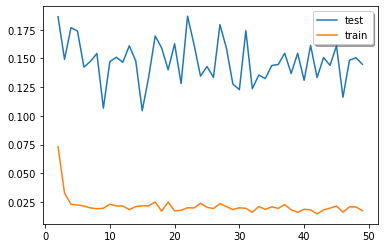

In [62]:
train_x, test_x, train_y, test_y = train_test_split(x,y)

rng = range(2,50)
error_train = []
error_test = []
for i in rng:
    rf_regressor = RandomForestRegressor(n_estimators=80, max_depth=i)
    rf_regressor.fit(train_x, train_y)
    error_train.append(1 - rf_regressor.score(train_x, train_y))
    error_test.append(1 - rf_regressor.score(test_x, test_y))

plt.plot(rng, error_test, label="test")
plt.plot(rng, error_train, label="train")
plt.legend(shadow=True)
plt.show()

krzywe te maja być nadążne i minimalne , ale !=0